Data Cleaning Steps:

0. Remove largest outliner, filter on only P transactions


1. Identify Missing Merchnumber
    - Identify the most common merchnumber for each merchname, replace missing merchnumbers with that mode
    - For remaining missing merch numbers, fill in with unique value


2. Identify Missing Zip/State
    - Identify the most common zip for each merchname, replace missing zip with that mode
    - Fill in remaning Rows that share the same merch description and contains a fraudlent value.
    - Fill in remaning missing zip with unique value 
    - Match missing states back to zip codes

In [136]:
import pandas as pd
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import calendar
import time
from random import randrange

In [137]:
df = pd.read_excel('card transactions.xlsx')
data = df.copy()

Text(0.5, 1.0, 'Top 15 most frequent Merchnum')

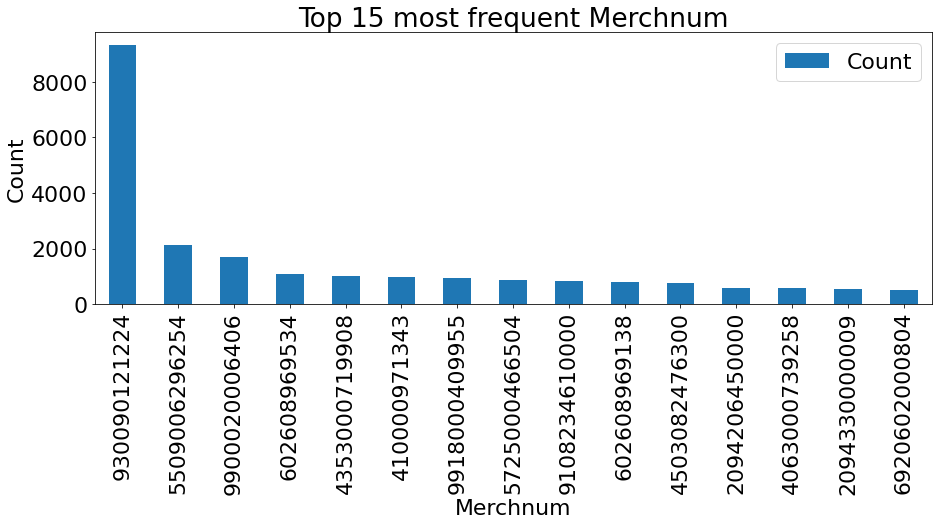

In [138]:
index = data['Merchnum'].value_counts().iloc[0:15].index.values
count = data['Merchnum'].value_counts()[:15].sort_values(ascending=False).values
d = {'Merchnum':index,'Count':count}
d = pd.DataFrame(d)

ax = d.plot.bar(x='Merchnum', y='Count', rot=90,figsize=(15,5));
ax.set_xlabel('Merchnum')
ax.set_ylabel('Count')
ax.set_title('Top 15 most frequent Merchnum')

# 0. Removing  single large outliner. Only keep transaction of type  = P

In [133]:
len(data)

96753

In [142]:
data.sort_values('Amount', ascending=False)

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
52714,52715,5142189135,2010-07-13,NaN,INTERMEXICO,NaN,NaN,P,3102045.53,0
47339,47340,5142275225,2010-06-22,NaN,INTERSOL,NaN,NaN,P,47900.00,0
59516,59517,5142138135,2010-08-03,900009045549,KRACKELER SCIENTIFIC,NY,12202.0,P,30372.46,1
80886,80887,5142152857,2010-10-11,NaN,CANYON ELECTRIC,NV,89102.0,P,28392.84,1
89673,89674,5142183210,2010-11-29,NaN,CRUCIAL TECH./MICRON,ID,83642.0,P,27218.00,0
...,...,...,...,...,...,...,...,...,...,...
47165,47166,5142148452,2010-06-22,930009906224,FEDEX SHP 05/23/10 AB#,TN,38118.0,P,0.08,0
57855,57856,5142129787,2010-07-30,9108347680000,STAPLES NATIONAL #471,NJ,7606.0,P,0.02,0
78387,78388,5142236687,2010-09-28,9108233080006,STAPLES #990,CA,90640.0,P,0.01,0
91179,91180,5142239369,2010-12-06,89200648125,JOHN WILEY & SON SOMERSET,NJ,8875.0,P,0.01,0


In [156]:
# Only keep P transaction type
data = data[data['Transtype'].str.contains("P")]

#Remove Single Outlier

data = data[data['Amount']!=3102045.53]

#remove single large outliers

## Merchnum
#outliner = data['Merchnum'].value_counts().iloc[0:1].index.values
#top = outliner[0]
#data = data[~data['Merchnum'].str.contains(top, na=False)]


## 
#outliner2 = data['Amount'].value_counts().iloc[0:1].index.values
#top2 = outliner2[0]
#data = data[data['Amount'] != top2]

In [157]:
len(data)

96397

Distributions for outliners now looks good

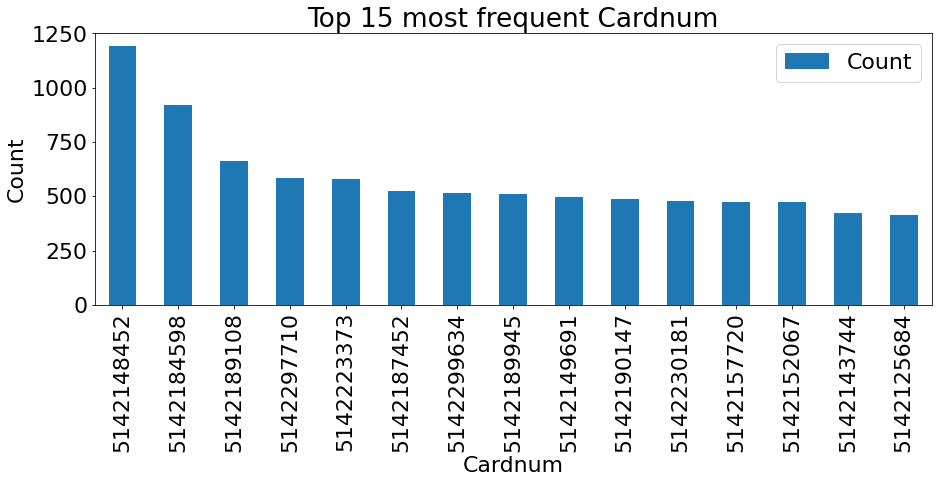

In [158]:
index = data['Cardnum'].value_counts().iloc[0:15].index.values
count = data['Cardnum'].value_counts()[:15].sort_values(ascending=False).values
d = {'Cardnum':index,'Count':count}
d = pd.DataFrame(d)

ax = d.plot.bar(x='Cardnum', y='Count', rot=90,figsize=(15,5));
ax.set_xlabel('Cardnum')
ax.set_ylabel('Count')
ax.set_title('Top 15 most frequent Cardnum')
plt.rcParams.update({'font.size': 22})

Text(0.5, 1.0, 'Top 15 most frequent Merchnum')

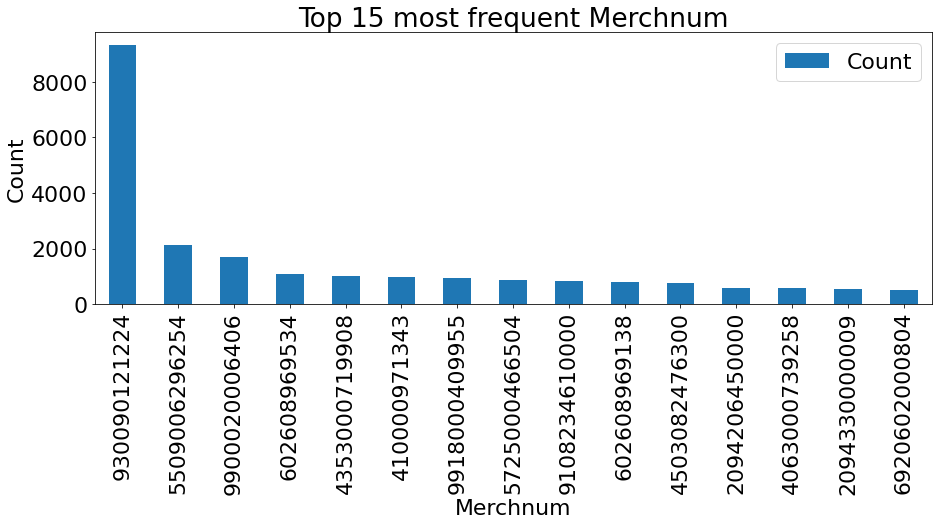

In [159]:
index = data['Merchnum'].value_counts().iloc[0:15].index.values
count = data['Merchnum'].value_counts()[:15].sort_values(ascending=False).values
d = {'Merchnum':index,'Count':count}
d = pd.DataFrame(d)

ax = d.plot.bar(x='Merchnum', y='Count', rot=90,figsize=(15,5));
ax.set_xlabel('Merchnum')
ax.set_ylabel('Count')
ax.set_title('Top 15 most frequent Merchnum')

Text(0.5, 1.0, 'Top 15 most frequent Merch description')

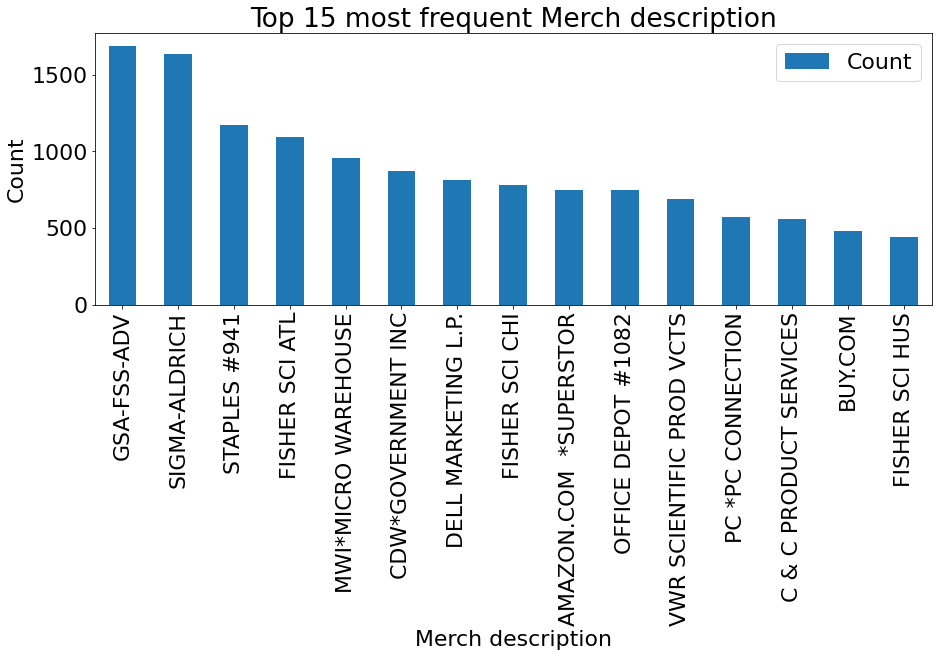

In [160]:
index = data['Merch description'].value_counts().iloc[0:15].index.values
count = data['Merch description'].value_counts()[:15].sort_values(ascending=False).values
d = {'Merch description':index,'Count':count}
d = pd.DataFrame(d)

ax = d.plot.bar(x='Merch description', y='Count', rot=90,figsize=(15,5));
ax.set_xlabel('Merch description')
ax.set_ylabel('Count')
ax.set_title('Top 15 most frequent Merch description')

Text(0.5, 1.0, 'Top 15 most frequent Merch state')

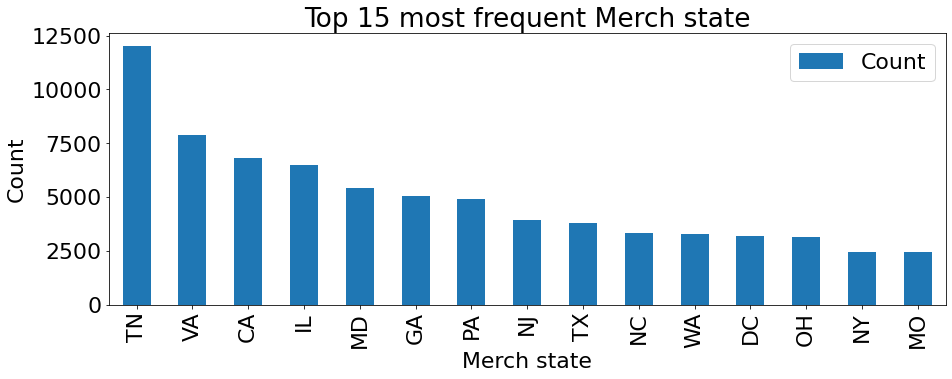

In [161]:
index = data['Merch state'].value_counts().iloc[0:15].index.values
count = data['Merch state'].value_counts()[:15].sort_values(ascending=False).values
d = {'Merch state':index,'Count':count}
d = pd.DataFrame(d)

ax = d.plot.bar(x='Merch state', y='Count', rot=90,figsize=(15,5));
ax.set_xlabel('Merch state')
ax.set_ylabel('Count')
ax.set_title('Top 15 most frequent Merch state')

/Users/sarahrussell/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0.5, 1.0, 'Top 15 most frequent Merch zip')

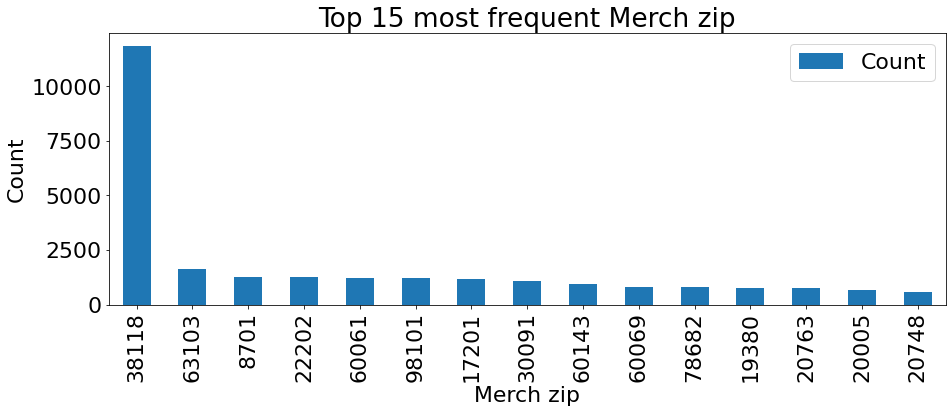

In [162]:
data2 = data.dropna(subset=['Merch zip'])
data2['Merch zip'] = data2['Merch zip'].astype(np.int64)

index = data2['Merch zip'].value_counts().iloc[0:15].index.values
count = data2['Merch zip'].value_counts()[:15].sort_values(ascending=False).values
d = {'Merch zip':index,'Count':count}
d = pd.DataFrame(d)

ax = d.plot.bar(x='Merch zip', y='Count', rot=90,figsize=(15,5));
ax.set_xlabel('Merch zip')
ax.set_ylabel('Count')
ax.set_title('Top 15 most frequent Merch zip')

Text(0.5, 1.0, 'Frequent Amount')

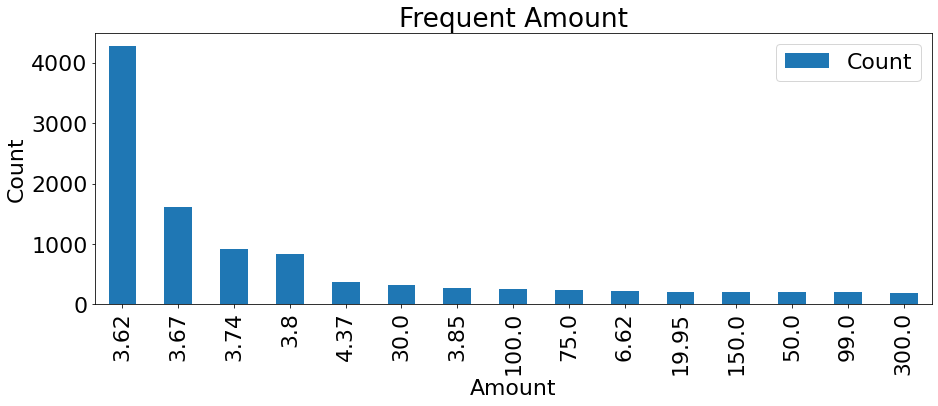

In [163]:
index = data['Amount'].value_counts().iloc[0:15].index.values
count = data['Amount'].value_counts()[:15].sort_values(ascending=False).values
count = count[0:15]
d = {'Amount':index,'Count':count}
d = pd.DataFrame(d)

ax = d.plot.bar(x='Amount', y='Count', rot=90,figsize=(15,5));
ax.set_xlabel('Amount')
ax.set_ylabel('Count')
ax.set_title('Frequent Amount')

# Filling in missing values

In [164]:
#data.test = data.copy()
data = data.reset_index(drop=True)

In [165]:
# Missing values 
data.isna().sum()

Recnum                  0
Cardnum                 0
Date                    0
Merchnum             3198
Merch description       0
Merch state          1020
Merch zip            4300
Transtype               0
Amount                  0
Fraud                   0
dtype: int64

## 1 Filling in missing Merchnum

In [166]:
merch=data.groupby('Merch description')[['Merchnum']].agg(lambda x: x.mode())
merch

,Merchnum
Merch description,
#9 SOFTWARE,6000330882278
(ISC)2 CERTIFICATION,590065510
0000000000000000000000,8168600400097
033007 KINKO'S,35068136338
05032 FLYING J,121075089FL96
...,...
ZYMARK CORPORATION,988906278331
ZYMAX ENVIROTECHNOLOGY,9612006916900
ZYMED LABORATORIES,679966068337


In [167]:
# drop the rows from the above data table that had a '[]' value; if you keep this brackets in will mess up later code

for i in merch.index:
    if len(merch.loc[i,'Merchnum'])<=1:
        merch=merch.drop(i)
        
for i in data.index:
    if data.loc[i,'Merch description']=='SANDERSON SAFETY SUPPLY':
        data.loc[i,'Merchnum']='800008008556'
        
# create loop to filling in missing merch numbers in data with mode table created
descs_missing_nums=[]

for i in data.index:
    if pd.isnull(data.loc[i,'Merchnum']):
        desc=data.loc[i,'Merch description']
        descs_missing_nums.append(desc)
        if desc in merch.index:
            data.loc[i,'Merchnum']=merch.loc[desc,'Merchnum']

In [168]:
#check how many values are still missing
data.isnull().sum()

Recnum                  0
Cardnum                 0
Date                    0
Merchnum             2041
Merch description       0
Merch state          1020
Merch zip            4300
Transtype               0
Amount                  0
Fraud                   0
dtype: int64

In [169]:
#for the remaining missing merch numbers, I assigned them unique names

missing_num_df=data.loc[pd.isnull(data['Merchnum']),:]
missing_num_df

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
199,202,5142140436,2010-01-03,NaN,MONTGOMERY COLLEGE-PHONE,MD,20850.0,P,266.00,0
260,263,5142257575,2010-01-04,NaN,RETAIL DEBIT ADJUSTMENT,NaN,NaN,P,320.00,0
270,273,5142124791,2010-01-04,NaN,RETAIL DEBIT ADJUSTMENT,NaN,NaN,P,970.00,0
398,401,5142276099,2010-01-04,NaN,RETAIL DEBIT ADJUSTMENT,NaN,NaN,P,82.59,0
474,477,5142267793,2010-01-05,NaN,RETAIL DEBIT ADJUSTMENT,NaN,NaN,P,17.59,0
...,...,...,...,...,...,...,...,...,...,...
96266,96622,5142253938,2010-12-30,NaN,OREGON ENVIRONMENTAL COUN,OR,97204.0,P,40.00,0
96296,96652,5142151962,2010-12-30,NaN,RETAIL DEBIT ADJUSTMENT,NaN,NaN,P,125.00,0
96334,96690,5142166019,2010-12-30,NaN,ADVANCED SEC & CONTROL,GA,30340.0,P,70.50,0
96364,96721,5142178272,2010-12-31,NaN,TRULOGIC SYSTEMS,ON,NaN,P,343.42,0


In [170]:
missing_num_list=pd.Series(missing_num_df['Merch description'].unique())

unique_list=[]

for i in range(487):
    unique_list.append('Unique'+str(i))
    
unique_dict=dict(zip(missing_num_list,unique_list))
unique_dict

for i in data.index:
    if pd.isnull(data.loc[i,'Merchnum']):
        data.loc[i,'Merchnum']=unique_dict[data.loc[i,'Merch description']]

In [171]:
#check how many values are still missing
data.isnull().sum()

Recnum                  0
Cardnum                 0
Date                    0
Merchnum                0
Merch description       0
Merch state          1020
Merch zip            4300
Transtype               0
Amount                  0
Fraud                   0
dtype: int64

## 2 Filling in missing Zip/ State

In [172]:
# Identify the most common zip for each merchname, replace missing zip with that mode

zip_df=data.groupby('Merch description')[['Merch zip']].agg(lambda x: x.mode())
zip_df.columns=['zip']
zip_df['zip']=zip_df['zip'].astype(str)

for i in zip_df.index:
    if len(zip_df.loc[i,'zip'])<=2:
        zip_df=zip_df.drop(i)

for i in data.index:
    if pd.isnull(data.loc[i,'Merch zip']) and data.loc[i,'Merch description'] in zip_df.index:
        desc=data.loc[i,'Merch description']
        data.loc[i,'Merch zip']= zip_df.loc[desc,'zip']

In [173]:
data.isnull().sum()

Recnum                  0
Cardnum                 0
Date                    0
Merchnum                0
Merch description       0
Merch state          1020
Merch zip            2043
Transtype               0
Amount                  0
Fraud                   0
dtype: int64

In [174]:
# Selection are all the remaining rows contaning missing values. 

data['Merch state'] = data['Merch state'].fillna(0)
data['Merch zip'] = data['Merch zip'].fillna(0)


selection = data.loc[data['Merch state']==0]
selection_zip = data.loc[data['Merch zip']==0]

In [175]:
#len(selection)

In [176]:
#sum(selection['Fraud'])

In [177]:
#selection.head(30)

In [178]:
# Frauds that have missing values 
#selection.loc[selection['Fraud']==1]

In [179]:
index1 = data[data['Merch zip'] ==0].index

for i in index1: 
    data.loc[i,'Merch zip'] = 'UniqueZip101' + str(i)

In [ ]:
data.isin([0]).sum()

In [ ]:
#Zip are empty

In [ ]:
#map missing states back to zip codes
zip_dict=dict(data.groupby('Merch state')['Merch zip'].unique())
zip_dict

In [ ]:
#matching missing states with zips from dict
for i in data.index:
    for key in zip_dict:
        if (data.loc[i,'Merch state']==0) and data.loc[i,'Merch zip'] in zip_dict[key]:
            data.loc[i,'Merch state']=key
        

In [ ]:
data

In [ ]:
zip_df=data.groupby('Merch state')[['Merch zip']].agg(lambda x: x.mode())
zip_df.columns=['zip']
zip_df['zip']=zip_df['zip'].astype(str)
zip_df.head(50)

In [ ]:
data['Merch zip'] = data['Merch zip'].replace(0,np.nan)

for i in zip_df.index:
    if len(zip_df.loc[i,'zip'])<=2:
        zip_df.loc[i,'zip'] = 54321 + randrange(10)


for i in data.index:
    if pd.isnull(data.loc[i,'Merch zip']) and data.loc[i,'Merch state'] in zip_df.index:
        desc=data.loc[i,'Merch state']
        data.loc[i,'Merch zip']= zip_df.loc[desc,'zip']

In [ ]:
data.isin([0]).sum()

In [ ]:
index2 = data[data['Merch state'] ==0].index

for i in index2: 
    data.loc[i,'Merch state'] = 'UniqueState101' + str(i)

In [ ]:
data.isin([0]).sum()

In [ ]:
data.to_csv('clean_data.csv')